In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, ode

import smplotlib
# plt.style.use("ggplot")
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.size'] = 13
# plt.rcParams.update({'figure.autolayout': True})
# plt.rc('text', usetex=True)
pd.set_option('display.max_columns', 50)
%config IPCompleter.greedy=True

In [39]:
SRESOLUTION = 100

def get_end_point( F0, alfa0, beta):
    """Integrates based on given initial conditions and beta.
    Returns array Faxy."""
    initial = [F0, alfa0, 0, 0]
    def odes(s, arej, beta):
        F, alfa, x, y = arej
        Fpika = - beta*x*np.cos(alfa) + np.sin(alfa)
        alfapika = (beta*x*np.sin(alfa) + np.cos(alfa))/F
        xpika = np.cos(alfa)
        ypika = np.sin(alfa)
        return [Fpika, alfapika, xpika, ypika]
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, 0).set_f_params(beta)
    return r.integrate(1)
def get_trajectory(F0, alfa0, beta):
    """Integrates based on given initial conditions and beta.
    Returns trajectory Faxy."""
    initial = [F0, alfa0, 0, 0]
    def odes(s, arej, beta):
        F, alfa, x, y = arej
        Fpika = - beta*x*np.cos(alfa) + np.sin(alfa)
        alfapika = (beta*x*np.sin(alfa) + np.cos(alfa))/F
        xpika = np.cos(alfa)
        ypika = np.sin(alfa)
        return [Fpika, alfapika, xpika, ypika]
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, 0).set_f_params(beta)
    ss = np.linspace(0,1, 2000)
    sol = np.zeros((ss.shape[0],4))
    for i, t in enumerate(ss):
        sol[i,:] = r.integrate(t)
    return sol
def shoot(beta, y_final):
    """For a given beta and y_final finds initial conditions
    of F0 and alfa0 and promplty returns them, if found, else None."""
    def _fun_to_minimize(arej, beta, y_final):
        F0, alfa0 = arej
        xy = get_end_point(F0, alfa0, beta)[-2:]
        xf, yf = xy[0], xy[1]
        return [xf, yf-y_final]
    from scipy.optimize import root
    for bleh in range(100):
        rez = root(_fun_to_minimize, [np.random.rand(), np.random.rand()*np.pi*2], args=(beta, y_final), tol=1e-15)
        if rez.success:
            print(f"Initial guesses converged after {bleh+1} tries.")
            return rez.x


for i, beta in enumerate([1000, 1000, 1000, 100, 100, 100, 100, 10, 10, 10, 10]):
    # beta = 30
    y_final = -0.8
    rez = shoot(beta, y_final)
    trajektorija = get_trajectory(rez[0], rez[1], beta)
    fig, ax = plt.subplots()
    ax.set_title(fr"$F_0={{{rez[0]:0.2f}}}, \alpha_0={{{rez[1]:0.2f}}}, \beta={{{beta}}}$")
    ax.plot(trajektorija[:,2], trajektorija[:,3])
    # ax.set_aspect('equal')
    # plt.savefig(f"images/2024-1-trajektorija{i}.pdf")
    plt.show()

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


KeyboardInterrupt: 

Initial guesses converged after 5 tries.


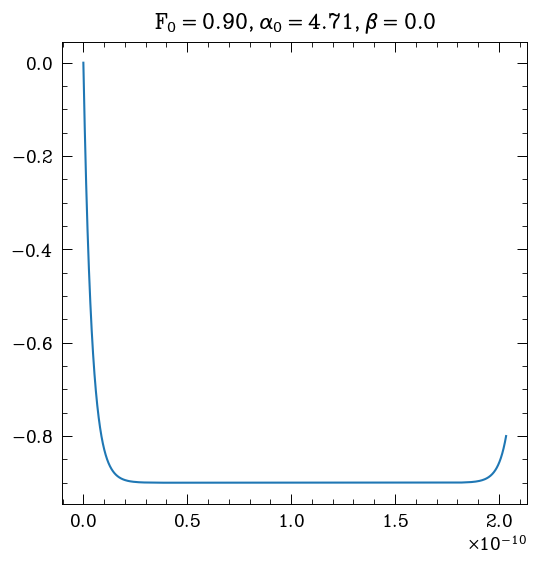

In [50]:
%matplotlib inline
beta = 0.00
y_final = -0.8
rez = shoot(beta, y_final)
trajektorija = get_trajectory(rez[0], rez[1], beta)
fig, ax = plt.subplots()
ax.set_title(fr"$F_0={{{rez[0]:0.2f}}}, \alpha_0={{{rez[1]:0.2f}}}, \beta={{{beta}}}$")
ax.plot(trajektorija[:,2], trajektorija[:,3])
# ax.set_aspect('equal')
plt.savefig(f"images/2024-1-trajektorija_limit_beta0.pdf")
plt.show()

Initial guesses converged after 13 tries.


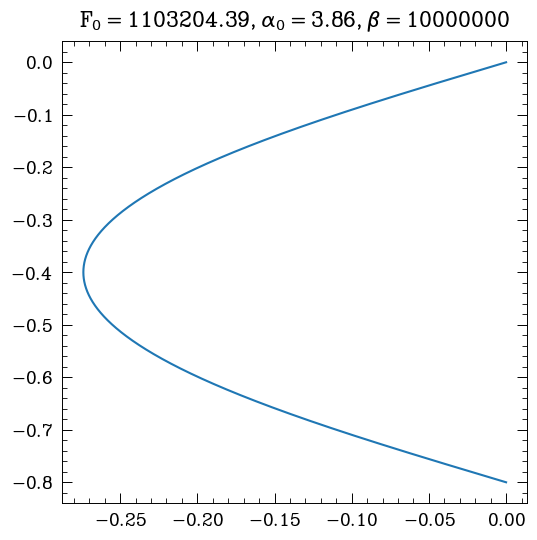

In [70]:
%matplotlib inline
beta = 10000000
y_final = -0.8
def shoot_nonrandom(beta, y_final):
    """For a given beta and y_final finds initial conditions
    of F0 and alfa0 and promplty returns them, if found, else None."""
    def _fun_to_minimize(arej, beta, y_final):
        F0, alfa0 = arej
        xy = get_end_point(F0, alfa0, beta)[-2:]
        xf, yf = xy[0], xy[1]
        return [xf, yf-y_final]
    from scipy.optimize import root
    for bleh in range(100):
        rez = root(_fun_to_minimize, [np.random.randint(10000, 10000000), 4], args=(beta, y_final), tol=1e-15)
        if rez.success:
            print(f"Initial guesses converged after {bleh+1} tries.")
            return rez.x
rez = shoot_nonrandom(beta, y_final)
trajektorija = get_trajectory(rez[0], rez[1], beta)
fig, ax = plt.subplots()
ax.set_title(fr"$F_0={{{rez[0]:0.2f}}}, \alpha_0={{{rez[1]:0.2f}}}, \beta={{{beta}}}$")
ax.plot(trajektorija[:,2], trajektorija[:,3])
# ax.set_aspect('equal')
plt.savefig(f"images/2024-1-trajektorija_limit_betainf.pdf")
plt.show()

In [ ]:

betas = np.linspace(0.01, 100, 100)
l_avgs = []
l_stds = []
for beta in betas:
    results = []
    for i in range(10):
        y_final = -0.8
        rez = shoot(beta, y_final)
        trajektorija = get_trajectory(rez[0], rez[1], beta)
        x, y = trajektorija[:, 2], trajektorija[:, 3]
        l = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
        results.append(l.sum())
    l_avgs.append(
        np.mean(results)
    )
    l_stds.append(np.std(results))



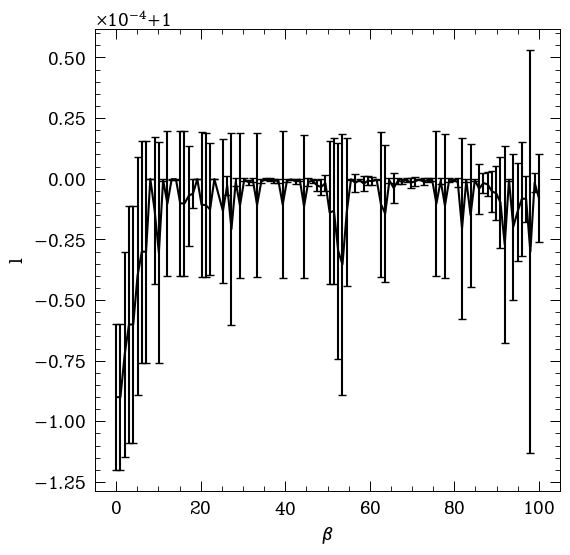

In [76]:
betas = np.array(betas)
l_stds = np.array(l_stds)
l_avgs= np.array(l_avgs)


plt.errorbar(betas[l_stds<1e-4], y=l_avgs[l_stds<1e-4], yerr=l_stds[l_stds<1e-4], ecolor="k", color="k")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$l$")
plt.savefig("images/2024-1-ohranitev_dolzine.pdf")
plt.show()

## Pomožne funkcije za opis trajektorije:

In [3]:
def get_shape(trajektorija):
    """Calculates number of times the shape crosses x=0 line.
    Inspired by https://stackoverflow.com/questions/2652368/how-to-detect-a-sign-change-for-elements-in-a-numpy-array"""
    x = trajektorija[:,2]
    asign = np.sign(x)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    return np.sum(signchange)
def get_y_min(trajektorija):
    return np.min(trajektorija[:,3])
def get_x_max(trajektorija):
    abs_x = np.abs(trajektorija[:,2])
    return np.max(abs_x)

### Loop za $y_{final}$ in $\beta$:

In [34]:
rezults.shape

(10000, 5)

In [4]:
try:
    rezults = np.loadtxt("2020-rezults100.txt")
except:
    M = 100
    yfs = np.linspace(-1, -.1, M)
    betas = np.logspace(-1, 2, M)
    rezults = np.empty((M**2, 5))
    i = 0
    for yf in yfs:
        for beta in betas:
            [F0, alfa], trajektorija = trajectory(beta, yf)
            rezults[i,:] = yf, beta, get_shape(trajektorija), get_y_min(trajektorija), get_x_max(trajektorija)
            i += 1
            if i%1000==0:
                print(f"{i*100/M**2:0.02}%", end="   ")
    np.savetxt(f"2020-rezults{M}.txt", rezults)

In [5]:
# from scipy.interpolate import griddata
# x,y,z = rezults[:,0],rezults[:,1],rezults[:,2]

# yy, xx = np.meshgrid(y,x)
# zz = griddata((x,y),z,(xx,yy))

# # plt.contourf(xx,yy,zz-2, cmap='RdBu') # if you want contour plot
# plt.imshow(zz)
# plt.colorbar()
# plt.title(r"# prehodov preko $x=0$")
# plt.xlabel(r"$y_{\mathrm{ Final}}$")
# plt.ylabel(r"$\beta$")

# plt.savefig("images/2024-1-fazniportret_prehodi3.pdf")
# plt.show()

In [6]:
# from scipy.interpolate import griddata
# x,y,z = rezults[:,0],rezults[:,1],rezults[:,3]

# yy, xx = np.meshgrid(y,x)
# zz = griddata((x,y),z,(xx,yy))

# plt.contourf(xx,yy,zz, cmap='RdBu') # if you want contour plot
# #plt.imshow(zz)
# plt.colorbar()
# plt.title(r"$y_{\mathrm{ min}}$")
# plt.xlabel(r"$y_{\mathrm{ Final}}$")
# plt.ylabel(r"$\beta$")


# plt.savefig("images/2024-1-fazniportret_ymin3.pdf")
# plt.show()

In [7]:
# from scipy.interpolate import griddata
# x,y,z = rezults[:,0],rezults[:,1],rezults[:,4]

# yy, xx = np.meshgrid(y,x)
# zz = griddata((x,y),z,(xx,yy))

# plt.contourf(xx,yy,zz, cmap='RdBu') # if you want contour plot
# #plt.imshow(zz)
# plt.colorbar()
# plt.title(r"$\left|x_{\mathrm{ max}}\right|$")
# plt.xlabel(r"$y_{\mathrm{ Final}}$")
# plt.ylabel(r"$\beta$")

# plt.savefig("images/2024-1-fazniportret_xmax3.pdf")
# plt.show()

In [8]:
# # rezults = np.loadtxt("2020-rezults100.txt")
# rezults[:2,:]

In [17]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return "{:0.2f}".format(10**val)
import matplotlib.colors
data = rezults[:,2]
colormap = plt.get_cmap("Oranges")
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
x,y,z = rezults[:,0],np.log10(rezults[:,1]),data
ax.scatter(x,y,z, c=colormap(norm(data)))
ax.set_title("Oblika - spremembe predznaka")
ax.set_xlabel("\n" + r"$y_{\mathrm{ Final}}$")
ax.set_ylabel("\n" + r"$\beta$")
plt.tight_layout()
plt.show()

In [18]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return "{:0.2f}".format(10**val)
import matplotlib.colors
data = rezults[:,3]
colormap = plt.get_cmap("Oranges")
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
x,y,z = rezults[:,0],np.log10(rezults[:,1]),data
ax.scatter(x,y,z, c=colormap(norm(data)), )
ax.set_title("\n"+ r"$y_{\mathrm{min}}$")
ax.set_xlabel("\n"+ r"$y_{\mathrm{ Final}}$")
ax.set_ylabel("\n"+ r"$\beta$")

plt.show()

In [19]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return "{:0.2f}".format(10**val)
import matplotlib.colors
data = rezults[:,4]
colormap = plt.get_cmap("Oranges")
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
x,y,z = rezults[:,0],np.log10(rezults[:,1]),data
ax.scatter(x,y,z, c=colormap(norm(data)))
ax.set_title("\n" + r"$x_{\mathrm{max}}$")
ax.set_xlabel("\n" + r"$y_{\mathrm{ Final}}$")
ax.set_ylabel("\n" + r"$\beta$")

plt.show()

# Druga naloga

In [ ]:
%matplotlib inline
def U(x,y):
    return 0.5*x**2+0.5*(y**2)+(x**2)*y-(y**3)/3

def get_trajectory(H, y0, alpha, num_points=400, max_time=50):
    """Integrates based on given initial full energy,
    direction alpha and vertical position y0."""
    x0 = 0
    speed = np.sqrt(2*(H-U(x0,y0)))
    u0 = speed*np.cos(alpha)
    v0 = speed*np.sin(alpha)
    initial = [x0, y0, u0, v0]
    def odes(t, arej):
        x,y,u,v = arej
        xpika = u
        ypika = v
        upika = - x -2*x*y
        vpika = -y-x**2+y**2
        return [xpika,ypika,upika,vpika]
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, 0)
    ss = np.linspace(0,max_time, num_points)
    sol = np.empty((ss.shape[0],4))
    for i, t in enumerate(ss):
        sol[i,:] = r.integrate(t)
    from collections import namedtuple
    rezultat = namedtuple("Rezultat", ["x","y","u","v","param_dict"])
    return rezultat(sol[:,0],sol[:,1],sol[:,2],sol[:,3], {"y0":y0, "H":H, "alpha":alpha})

rez = get_trajectory(0.01, 0.01, 0.01, max_time=900, num_points=2000)
plt.plot(rez.x, rez.y)
plt.title(fr"""Orbita, H={{{rez.param_dict['H']}}}, $y_0$={{{rez.param_dict['y0']}}}, $\alpha$={{{rez.param_dict['alpha']}}} """)
plt.axes().set_aspect('equal')
plt.savefig("images/2024-2-trajektorija3.pdf")
plt.show()

In [ ]:
class Trajektorija:
    def __init__(self, H, y0, alpha, num_points=400, max_time=50, min_time=0):
        self.H = H
        self.y0 = y0
        self.alpha = alpha
        self.tranatu = None
        self.num_points   =num_points
        self.max_time   =max_time
        self.min_time   =min_time
    @staticmethod
    def U(x,y):
        return 0.5*x**2+0.5*(y**2)+(x**2)*y-(y**3)/3
    def get_trajectory(self,):
        """Integrates based on given initial full energy,
        direction alpha and vertical position y0."""
        x0 = 0
        speed = np.sqrt(2*(self.H-Trajektorija.U(x0,self.y0)))
        u0 = speed*np.cos(self.alpha)
        v0 = speed*np.sin(self.alpha)
        initial = [x0, self.y0, u0, v0]
        def odes(t, arej):
            x,y,u,v = arej
            xpika = u
            ypika = v
            upika = - x -2*x*y
            vpika = -y-x**2+y**2
            return [xpika,ypika,upika,vpika]
        r = ode(odes).set_integrator('dopri5')
        r.set_initial_value(initial, 0)
        ss = np.linspace(self.min_time,self.max_time, self.num_points)
        sol = np.empty((ss.shape[0],4))
        rezs = []
        for i, t in enumerate(ss):
            sol[i,:] = r.integrate(t)
            if i==0:
                continue
            if (sol[i-1,0] < 0) and (sol[i,0] >= 0):
                    alpha = abs(sol[i-1,0])/(ss[i]-ss[i-1])
                    rezs.append(
                    [alpha*sol[i-1,1]+(1-alpha)*sol[i,1], alpha*sol[i-1, 3]+(1-alpha)*sol[i, 3]])
        from collections import namedtuple
        rezultat = namedtuple("Rezultat", ["x","y","u","v","t","param_dict"])
        self.tranatu = rezultat(sol[:,0],sol[:,1],sol[:,2],sol[:,3], ss, {"y0":self.y0, "H":self.H, "alpha":self.alpha})
        if len(rezs)!=0:
            rezs = np.array(rezs)
            self.poincare = namedtuple("poincs", ["y","v"])(rezs[:,0], rezs[:,1])
        else:
            self.poincare = namedtuple("poincs", ["y","v"])([], [])

In [ ]:

prva = Trajektorija(0.0097, 0.0955, 3.142, max_time=400, num_points=1000)
prva.get_trajectory()
#prva.get_trajectory()
fig, [ax1, ax2] = plt.subplots(ncols=2)
plt.suptitle(fr"Trajektorija za H={{{prva.H}}}, $y_0$={{{prva.y0}}}, alfa={{{prva.alpha:0.3}}}, t={{{prva.max_time}}}")
ax1.set_title("Trajektorija")
ax1.plot(prva.tranatu.x, prva.tranatu.y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")
ax2.set_title("Poincaréjev presek")
ax2.scatter(prva.poincare.y, prva.poincare.v,s=1)
ax2.set_xlabel("y")
ax2.set_ylabel("v")
ax2.set_aspect("equal")

plt.show()

In [ ]:
def funkc(arej):
    H,y0, alfa = arej
    p = Trajektorija(H, y0, alfa, max_time=200, num_points=1000)
    p.get_trajectory()
    return np.std(p.poincare.y)+np.std(p.poincare.v)
from scipy.optimize import minimize
res = minimize(funkc, x0=[0.001, 0.096, 3.142])

In [ ]:
rez.x

In [ ]:
prva = Trajektorija(*rez.x, max_time=400, num_points=1000)
prva.get_trajectory()
#prva.get_trajectory()
fig, [ax1, ax2] = plt.subplots(ncols=2)
plt.suptitle(fr"Trajektorija za H={{{prva.H:0.2}}}, $y_0$={{{prva.y0:0.2}}}, alfa={{{prva.alpha:0.3}}}, t={{{prva.max_time}}}")
ax1.set_title("Trajektorija")
ax1.plot(prva.tranatu.x, prva.tranatu.y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")
ax2.set_title("Poincaréjev presek")
ax2.scatter(prva.poincare.y, prva.poincare.v,s=1)
ax2.set_xlabel("y")
ax2.set_ylabel("v")
ax2.set_aspect("equal")

plt.show()